# TSAI Assignment 6

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils
import model

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
centerCrop = 22
resize = 28
randomRotate = 15.
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(centerCrop, resize, randomRotate,mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

Plot some train data to make sure the loading is correct

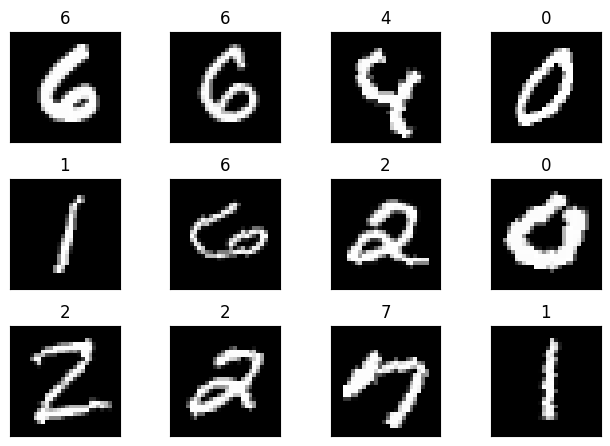

In [5]:
utils.plotData(train_loader, 12, 'gray')

Creating the first model, from the module - model

In [6]:
myFirstModel = model.getModel()

Print the model summary to know your model

In [7]:
utils.printModelSummary(myFirstModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
            Conv2d-4           [-1, 16, 28, 28]           1,168
              ReLU-5           [-1, 16, 28, 28]               0
       BatchNorm2d-6           [-1, 16, 28, 28]              32
           Dropout-7           [-1, 16, 28, 28]               0
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9            [-1, 8, 14, 14]             136
      BatchNorm2d-10            [-1, 8, 14, 14]              16
           Conv2d-11           [-1, 16, 14, 14]           1,168
             ReLU-12           [-1, 16, 14, 14]               0
      BatchNorm2d-13           [-1, 16, 14, 14]              32
           Conv2d-14           [-1, 32,

D:\SRT_Courses\MachineLearning\TSAI\Session6\Assignment6\model_trial.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

Train and test your model for mutiple epochs

In [9]:
optimizer = optim.SGD(myFirstModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myFirstModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myFirstModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.5549 Batch_id=117 Accuracy=71.59: 100%|████████████████████████████████| 118/118 [00:20<00:00,  5.70it/s]


Test set: Average loss: 0.4159, Accuracy: 9577/10000 (95.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2025 Batch_id=117 Accuracy=94.76: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.18it/s]


Test set: Average loss: 0.1921, Accuracy: 9732/10000 (97.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2296 Batch_id=117 Accuracy=96.48: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.25it/s]


Test set: Average loss: 0.1303, Accuracy: 9809/10000 (98.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1742 Batch_id=117 Accuracy=97.20: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.75it/s]


Test set: Average loss: 0.1027, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1232 Batch_id=117 Accuracy=97.64: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.86it/s]


Test set: Average loss: 0.0757, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1298 Batch_id=117 Accuracy=97.97: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.18it/s]


Test set: Average loss: 0.0661, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0877 Batch_id=117 Accuracy=98.06: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.23it/s]


Test set: Average loss: 0.0613, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0965 Batch_id=117 Accuracy=98.25: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.43it/s]


Test set: Average loss: 0.0564, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1427 Batch_id=117 Accuracy=98.38: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.65it/s]


Test set: Average loss: 0.0520, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1268 Batch_id=117 Accuracy=98.43: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.78it/s]


Test set: Average loss: 0.0458, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0673 Batch_id=117 Accuracy=98.57: 100%|████████████████████████████████| 118/118 [00:14<00:00,  8.24it/s]


Test set: Average loss: 0.0422, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0841 Batch_id=117 Accuracy=98.63: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.74it/s]


Test set: Average loss: 0.0420, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0674 Batch_id=117 Accuracy=98.72: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.84it/s]


Test set: Average loss: 0.0381, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0488 Batch_id=117 Accuracy=98.73: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.94it/s]


Test set: Average loss: 0.0377, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0366 Batch_id=117 Accuracy=98.81: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.96it/s]


Test set: Average loss: 0.0349, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0764 Batch_id=117 Accuracy=98.94: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.19it/s]


Test set: Average loss: 0.0321, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0279 Batch_id=117 Accuracy=98.93: 100%|████████████████████████████████| 118/118 [00:13<00:00,  9.02it/s]


Test set: Average loss: 0.0318, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0494 Batch_id=117 Accuracy=98.93: 100%|████████████████████████████████| 118/118 [00:13<00:00,  9.03it/s]


Test set: Average loss: 0.0317, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0516 Batch_id=117 Accuracy=98.92: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.79it/s]


Test set: Average loss: 0.0309, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0432 Batch_id=117 Accuracy=98.95: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.21it/s]


Test set: Average loss: 0.0309, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the train and test accuracy

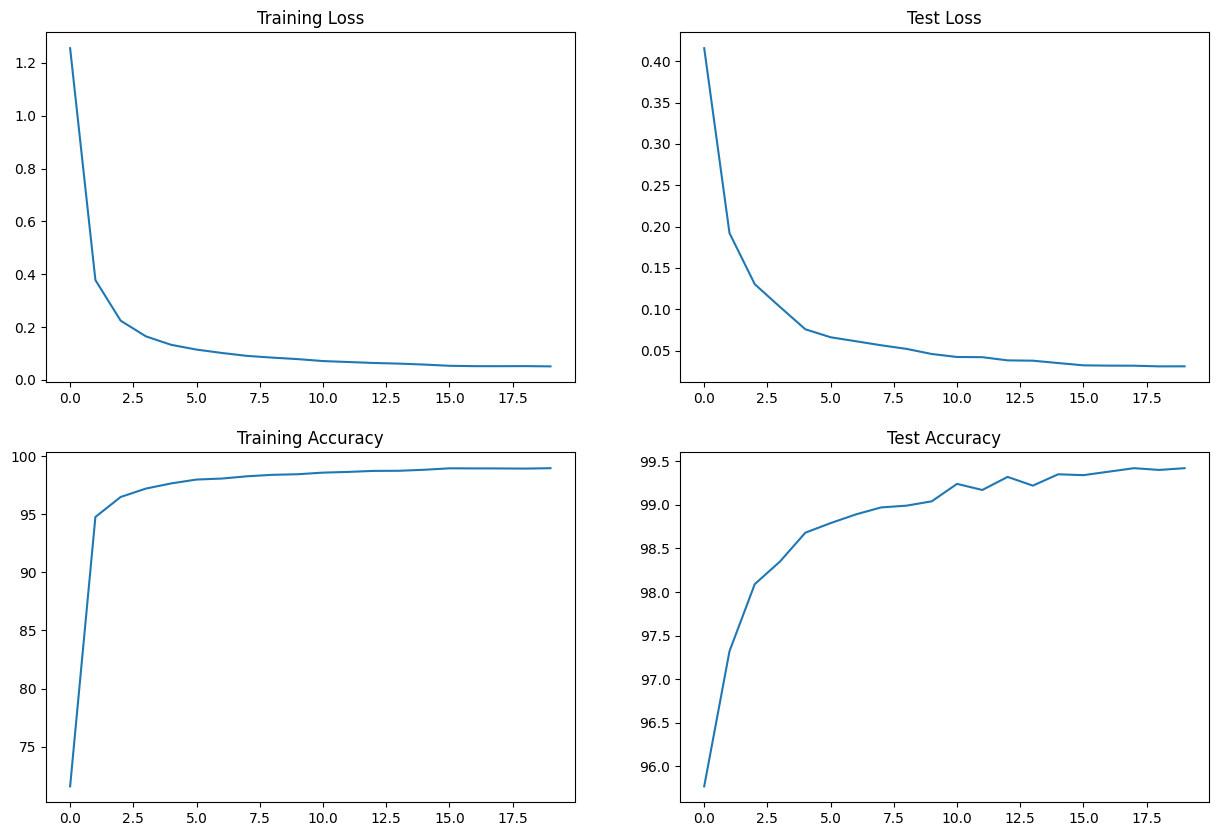

In [10]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)

In [11]:
x = 14
print(id(x))
x *= 2
print(id(x))

140705679008968
140705679009416


In [12]:
from utils import torch
t = torch.tensor([
    [1, 0, 0, 2],
    [0, 3, 3, 0],
    [4, 0, 0, 5]
], dtype=torch.float32)
t.max(dim=1) 

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 1, 3]))